In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("df_3.csv")

In [3]:
df.head()

,Timestamp,Device,CO,Humidity,Light,LPG,Motion,Smoke,Temperature
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.0,False,0.007651,False,0.020411,22.7
1,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.9,False,0.007673,False,0.020475,22.6
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.9,False,0.007664,False,0.020448,22.6
3,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.9,False,0.007673,False,0.020475,22.6
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004970,50.9,False,0.007667,False,0.020457,22.6


In [4]:
df.describe()

,Timestamp,CO,Humidity,LPG,Smoke,Temperature
count,1.874510e+05,187451.000000,187451.000000,187451.000000,187451.000000,187451.000000
mean,1.594858e+09,0.005560,50.814077,0.008306,0.022288,22.279969
std,1.995733e+05,0.000559,1.888926,0.000599,0.001720,0.481902
min,1.594512e+09,0.004646,45.100000,0.007301,0.019416,21.000000
25%,1.594685e+09,0.005079,49.600000,0.007788,0.020803,21.900000
50%,1.594858e+09,0.005439,50.900000,0.008183,0.021931,22.300000
75%,1.595031e+09,0.005993,52.100000,0.008778,0.023640,22.600000
max,1.595203e+09,0.007955,63.300000,0.010774,0.029422,24.100000


In [5]:
df.dtypes

Timestamp      float64
Device          object
CO             float64
Humidity       float64
Light             bool
LPG            float64
Motion            bool
Smoke          float64
Temperature    float64
dtype: object

In [6]:
df = df.drop(columns=['Device', 'CO', 'LPG'])

In [7]:
df

,Timestamp,Humidity,Light,Motion,Smoke,Temperature
0,1.594512e+09,51.0,False,False,0.020411,22.7
1,1.594512e+09,50.9,False,False,0.020475,22.6
2,1.594512e+09,50.9,False,False,0.020448,22.6
3,1.594512e+09,50.9,False,False,0.020475,22.6
4,1.594512e+09,50.9,False,False,0.020457,22.6
...,...,...,...,...,...,...
187446,1.595203e+09,48.4,False,False,0.023359,22.3
187447,1.595203e+09,48.4,False,False,0.023382,22.3
187448,1.595203e+09,48.5,False,False,0.023284,22.3
187449,1.595203e+09,48.5,False,False,0.023301,22.2


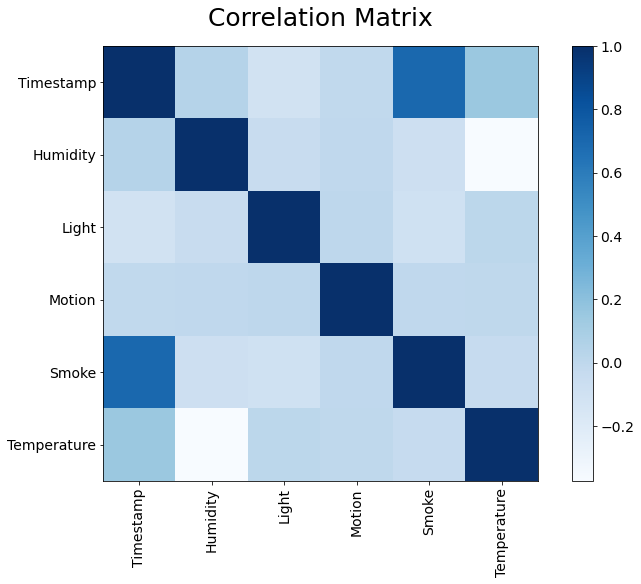

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(12,8))
plt.imshow(df.corr(), cmap=plt.cm.Blues)
plt.xticks(range(df.corr().shape[1]), df.corr().columns, fontsize=14, rotation=90)
plt.yticks(range(df.corr().shape[1]), df.corr().columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=25, pad=20)
plt.show()

In [9]:
df['LightOHE'] = df['Light'].apply(lambda x : 0 if x == False else 1)
df['MotionOHE'] = df['Motion'].apply(lambda x : 0 if x == False else 1)

In [10]:
df = df.drop(columns=['Light', 'Motion'])

In [11]:
df

,Timestamp,Humidity,Smoke,Temperature,LightOHE,MotionOHE
0,1.594512e+09,51.0,0.020411,22.7,0,0
1,1.594512e+09,50.9,0.020475,22.6,0,0
2,1.594512e+09,50.9,0.020448,22.6,0,0
3,1.594512e+09,50.9,0.020475,22.6,0,0
4,1.594512e+09,50.9,0.020457,22.6,0,0
...,...,...,...,...,...,...
187446,1.595203e+09,48.4,0.023359,22.3,0,0
187447,1.595203e+09,48.4,0.023382,22.3,0,0
187448,1.595203e+09,48.5,0.023284,22.3,0,0
187449,1.595203e+09,48.5,0.023301,22.2,0,0


In [12]:
df.describe()

,Timestamp,Humidity,Smoke,Temperature,LightOHE,MotionOHE
count,1.874510e+05,187451.000000,187451.000000,187451.000000,187451.000000,187451.000000
mean,1.594858e+09,50.814077,0.022288,22.279969,0.016010,0.000768
std,1.995733e+05,1.888926,0.001720,0.481902,0.125512,0.027706
min,1.594512e+09,45.100000,0.019416,21.000000,0.000000,0.000000
25%,1.594685e+09,49.600000,0.020803,21.900000,0.000000,0.000000
50%,1.594858e+09,50.900000,0.021931,22.300000,0.000000,0.000000
75%,1.595031e+09,52.100000,0.023640,22.600000,0.000000,0.000000
max,1.595203e+09,63.300000,0.029422,24.100000,1.000000,1.000000


In [13]:
df.dtypes

Timestamp      float64
Humidity       float64
Smoke          float64
Temperature    float64
LightOHE         int64
MotionOHE        int64
dtype: object

In [14]:
scale = df.Timestamp.max() - df.Timestamp.min()

In [15]:
scale

691322.8783380985

In [16]:
scale / 187451

3.6880191534753

In [17]:
df = df.drop(columns='Timestamp')

In [18]:
df = df.sort_values(by='MotionOHE')


In [19]:
df

,Humidity,Smoke,Temperature,LightOHE,MotionOHE
0,51.0,0.020411,22.7,0,0
124957,52.2,0.023429,22.2,0,0
124958,52.2,0.023446,22.2,0,0
124959,52.2,0.023353,22.2,0,0
124960,52.2,0.023423,22.2,0,0
...,...,...,...,...,...
41820,50.9,0.020884,22.4,0,1
85993,52.6,0.020544,22.8,0,1
113487,51.8,0.024134,22.1,0,1
106383,47.8,0.024363,22.0,0,1


In [20]:
df['MotionOHE'].value_counts()
df = df.iloc[187307 - 500: , : ]
x = df.drop(columns='MotionOHE')

In [21]:
x

,Humidity,Smoke,Temperature,LightOHE
62670,49.4,0.020571,22.2,0
62659,49.4,0.020507,22.3,0
62658,49.4,0.020461,22.3,0
62657,49.4,0.020539,22.3,0
62638,49.9,0.020443,22.4,0
...,...,...,...,...
41820,50.9,0.020884,22.4,0
85993,52.6,0.020544,22.8,0
113487,51.8,0.024134,22.1,0
106383,47.8,0.024363,22.0,0


In [22]:
y = df['MotionOHE']
y

62670     0
62659     0
62658     0
62657     0
62638     0
         ..
41820     1
85993     1
113487    1
106383    1
4262      1
Name: MotionOHE, Length: 644, dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x.Humidity = scaler.fit_transform(x.Humidity.values.reshape(-1, 1))
x.Smoke = scaler.fit_transform(x.Smoke.values.reshape(-1, 1))
x.Temperature = scaler.fit_transform(x.Temperature.values.reshape(-1, 1))

In [24]:
x

,Humidity,Smoke,Temperature,LightOHE
62670,0.388235,0.090477,0.333333,0
62659,0.388235,0.082071,0.388889,0
62658,0.388235,0.076082,0.388889,0
62657,0.388235,0.086281,0.388889,0
62638,0.447059,0.073695,0.444444,0
...,...,...,...,...
41820,0.564706,0.131442,0.444444,0
85993,0.764706,0.086880,0.666667,0
113487,0.670588,0.557637,0.277778,0
106383,0.200000,0.587684,0.222222,0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,stratify = y, test_size=0.2, random_state=3)

In [26]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()

log_r.fit(X_train, y_train)

score1 = log_r.score(X_test, y_test)
print("Model accuracy on the test set:",score1)

Model accuracy on the test set: 0.9224806201550387


In [27]:
prediction = log_r.predict(X_test)

In [28]:
print(y_test)

62890     0
62826     0
62839     0
104475    1
62485     0
         ..
66233     1
62924     0
133132    1
62775     0
62529     0
Name: MotionOHE, Length: 129, dtype: int64


In [29]:
import numpy as np
np.unique(prediction, return_counts=True)


(array([0, 1], dtype=int64), array([102,  27], dtype=int64))

In [30]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
score2 = xg.score(X_test, y_test)
print("Model accuracy on the test set:",score2)

Model accuracy on the test set: 0.9844961240310077


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, input_shape=(4,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,38

In [38]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)
score3 = model.evaluate(X_test, y_test)
print("\nModel accuracy on test set:", score3)

Train on 515 samples, validate on 129 samples
Epoch 1/10
515/515 [==============================] - 0s 89us/sample - loss: 0.0661 - acc: 0.9864 - val_loss: 0.1374 - val_acc: 0.9612
Epoch 2/10
515/515 [==============================] - 0s 86us/sample - loss: 0.0743 - acc: 0.9806 - val_loss: 0.1407 - val_acc: 0.9690
Epoch 3/10
515/515 [==============================] - 0s 85us/sample - loss: 0.0690 - acc: 0.9845 - val_loss: 0.1374 - val_acc: 0.9612
Epoch 4/10
515/515 [==============================] - 0s 88us/sample - loss: 0.0790 - acc: 0.9825 - val_loss: 0.1374 - val_acc: 0.9612
Epoch 5/10
515/515 [==============================] - 0s 89us/sample - loss: 0.0779 - acc: 0.9845 - val_loss: 0.1371 - val_acc: 0.9612
Epoch 6/10
515/515 [==============================] - 0s 96us/sample - loss: 0.0692 - acc: 0.9845 - val_loss: 0.1279 - val_acc: 0.9612
Epoch 7/10
515/515 [==============================] - 0s 95us/sample - loss: 0.0781 - acc: 0.9845 - val_loss: 0.1348 - val_acc: 0.9612
Epoch 8/1

In [39]:
from sklearn.metrics import f1_score

log_f1 = f1_score(y_test, log_r.predict(X_test))
print("The F1 score for linear regressor model is:",log_f1)
print()
xg_f1 = f1_score(y_test, xg.predict(X_test))
print("The F1 score for XGBoost model is:",xg_f1)
print()
nn_f1 = f1_score(y_test, model.predict_classes(X_test).reshape((-1,)))
print("The F1 score of the neural network is:",nn_f1)

The F1 score for linear regressor model is: 0.8214285714285715

The F1 score for XGBoost model is: 0.9642857142857143

The F1 score of the neural network is: 0.9090909090909091
